In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import re, nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import spacy
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.colors as mcolors
from collections import Counter
from matplotlib.ticker import FuncFormatter
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
from spacy.lang.id.stop_words import STOP_WORDS

In [57]:
import os
from sklearn.decomposition import PCA, KernelPCA

In [3]:
with open('exam.jsonl',) as f:
    data = [json.loads(line) for line in f]

In [4]:
df = pd.DataFrame(data)
df.to_excel("exam.xlsx")
df

,id,meta,url,title,content,content_html,analysis,keywords,hashtags,image,...,location,priority,datetime_ms,creation_time,create_date,code,unique_cat,unique_key,keys,mentions
0,61c42e207636ea31b28dcd4e,"{'mongodb_id': '61c42e207636ea31b28dcd4e', 'pa...",https://www.merdeka.com/peristiwa/aturan-skb-4...,Aturan SKB 4 Menteri: Tenaga Pendidik Menolak ...,Aturan SKB 4 Menteri: Tenaga Pendidik Menolak ...,<b>Merdeka.com - </b> Pemerintah mengeluarkan ...,"{'badword': False, 'block_content': False, 'bl...","""Kemendagri"" OR ""Kemendikbud"" OR ""Kemenhan"" OR...",[],[https://cdns.klimg.com/merdeka.com/i/w/news/2...,...,None,0,1640246756000,2022-03-07 19:02:00,2021-12-23,4.0,"[Tokoh (Attention), Generate-2 kata, Kementeri...","[Teknologi, Jakarta, Kasus, Laporan, Menkes, I...","[dihentikan, mengharuskan, rinci, penanggung, ...",[]
1,61c5572b7636ea31b28df852,"{'mongodb_id': '61c5572b7636ea31b28df852', 'pa...",https://solo.tribunnews.com/2021/12/24/nomor-t...,Nomor Telepon Darurat di Indonesia: Pemadam Ke...,Nomor Telepon Darurat di Indonesia: Pemadam Ke...,<p><strong>TRIBUNSOLO.COM -</strong> Nomor tel...,"{'badword': False, 'block_content': False, 'bl...","""Kemendagri"" OR ""Kemendikbud"" OR ""Kemenhan"" OR...",[],[],...,None,0,1640322858000,2022-03-07 19:01:51,2021-12-24,4.0,"[Negara-Negara, Singkatan, Generate-1 kata]","[Polisi, Indonesia, Negara, Kemenkes, Masyarak...","[darurat, kewaspadaan, id, dihubungi, negara, ...",[]
2,61b019155da6c5501a4d9165,"{'mongodb_id': '61b019155da6c5501a4d9165', 'pa...",https://www.kompasiana.com/wardhanahendra/61b0...,Tim Bulutangkis Indonesia Mundur dari Kejuaraa...,Tim Bulutangkis Indonesia Mundur dari Kejuaraa...,"<span class=""fr-img-caption fr-fic fr-dib""><sp...","{'badword': False, 'block_content': False, 'bl...","""Kemendagri"" OR ""Kemendikbud"" OR ""Kemenhan"" OR...",[#atletharuspaham],[],...,"[{'city': None, 'province': {'id': '51', 'name...",0,1638930709000,2022-03-07 19:03:51,2021-12-08,4.0,"[Negara-Negara, Singkatan, Provinsi, Generate-...","[Perang, Tim, Bali, Sikap, Pasangan, Tanah, Pe...","[puteri, setiawan, asuhan, pasukan, resah, kep...",[]
3,61cb17af7636ea31b28eb98a,"{'mongodb_id': '61cb17af7636ea31b28eb98a', 'pa...",https://www.antaranews.com/berita/2611913/poli...,Polisi tangkap pelaku penembakan di tambang em...,Polisi tangkap pelaku penembakan di tambang em...,"<div class=""quote_old"">Penangkapan pelaku ZZ b...","{'badword': False, 'block_content': False, 'bl...","""Kementan"" OR ""Kemnaker"" OR ""Kepri"" OR ""KHN"" O...",[],[],...,"[{'city': {'id': '1503', 'name': 'KABUPATEN SA...",0,1640699823000,2022-03-07 19:04:44,2021-12-28,4.0,"[KabKota, Singkatan, Provinsi, Generate-1 kata]","[Kabupaten, Tim, Laporan, Provinsi, Sumatera S...","[kaki, api, desa, tambang, zz, dibawa, bergera...",[]
4,61bfc5337636ea31b28d16d1,"{'mongodb_id': '61bfc5337636ea31b28d16d1', 'pa...",https://www.liputan6.com/news/read/4794363/ter...,Terdakwa Korupsi di PT Garuda Indonesia Hadino...,Terdakwa Korupsi di PT Garuda Indonesia Hadino...,"<b>Liputan6.com, Jakarta -</b> Mantan Direktur...","{'badword': False, 'block_content': False, 'bl...","""Komisi Informasi Pusat"" OR ""Komisi Kejaksaan""...",[],[https://cdn-production-assets-kly.akamaized.n...,...,None,0,1639915811000,2022-03-07 19:08:13,2021-12-19,4.0,"[Generate-2 kata, Kementerian-Lembaga, Negara-...","[Tim, Kasus, Jakarta, Suap, Uang, Tuntutan, Ko...","[membayar, plt, keterangannya, dinyatakan, jak...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,61c2f9997636ea31b28d9ec4,"{'mongodb_id': '61c2f9997636ea31b28d9ec4', 'pa...",https://sumeks.co/sering-dicibir-bapak-anak-ke...,"Sering Dicibir, Bapak-Anak Keroyok Tetangga Pa...","Sering Dicibir, Bapak-Anak Keroyok Tetangga Pa...",<p><strong><b>SUMEKS.CO</b></strong> &#x2013; ...,"{'badword': False, 'block_content': False, 'bl...","""Kota Payakumbuh"" OR ""Kota Sawahlunto"" OR ""Kot...",[],[https://sumeks.co/assets/foto/2021/12/bapak-a...,...,None,0,1640

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   object 
 1   meta           1000 non-null   object 
 2   url            1000 non-null   object 
 3   title          1000 non-null   object 
 4   content        1000 non-null   object 
 5   content_html   1000 non-null   object 
 6   analysis       1000 non-null   object 
 7   keywords       1000 non-null   object 
 8   hashtags       1000 non-null   object 
 9   image          1000 non-null   object 
 10  video          1000 non-null   object 
 11  location_id    604 non-null    object 
 12  location       604 non-null    object 
 13  priority       1000 non-null   int64  
 14  datetime_ms    1000 non-null   int64  
 15  creation_time  1000 non-null   object 
 16  create_date    1000 non-null   object 
 17  code           515 non-null    float64
 18  unique_ca

In [6]:
df['y-m'] = df['create_date'].str[0:7]

In [9]:
df['year'] = df['create_date'].str[0:4]

In [10]:
#df['create_date']=pd.to_datetime(df['create_date'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   object 
 1   meta           1000 non-null   object 
 2   url            1000 non-null   object 
 3   title          1000 non-null   object 
 4   content        1000 non-null   object 
 5   content_html   1000 non-null   object 
 6   analysis       1000 non-null   object 
 7   keywords       1000 non-null   object 
 8   hashtags       1000 non-null   object 
 9   image          1000 non-null   object 
 10  video          1000 non-null   object 
 11  location_id    604 non-null    object 
 12  location       604 non-null    object 
 13  priority       1000 non-null   int64  
 14  datetime_ms    1000 non-null   int64  
 15  creation_time  1000 non-null   object 
 16  create_date    1000 non-null   object 
 17  code           515 non-null    float64
 18  unique_ca

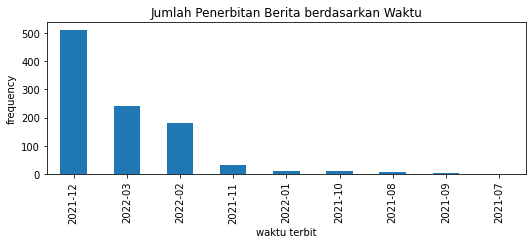

In [11]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

df['y-m'].value_counts().plot(ax=ax, kind='bar', xlabel='waktu terbit', ylabel='frequency')

plt.title("Jumlah Penerbitan Berita berdasarkan Waktu")
plt.show()

Text(0.5, 1.0, 'Jumlah Penerbitan Berita berdasarkan Waktu')

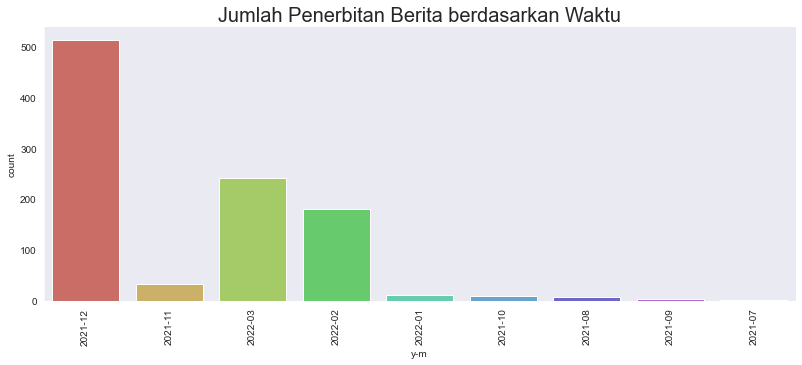

In [12]:
sns.set_style("dark")
graph = sns.catplot(data=df, x="y-m", kind="count", height = 4.5, aspect = 2.5, palette = "hls")
graph.set_xticklabels(rotation=90)
plt.title("Jumlah Penerbitan Berita berdasarkan Waktu", size = 20)

Text(0.5, 1.0, 'Jumlah Penerbitan Berita berdasarkan Tahun')

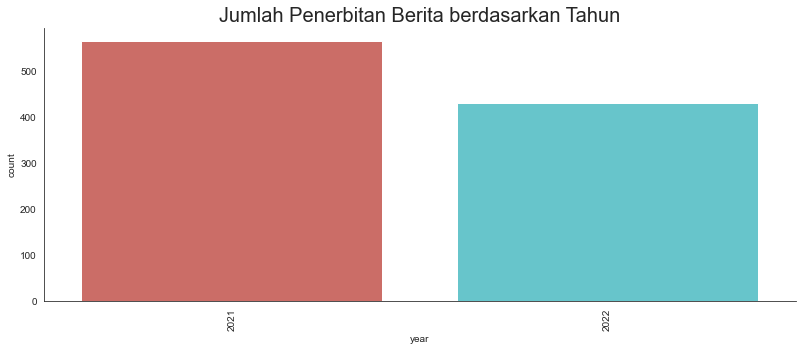

In [13]:
sns.set_style("white")
graph = sns.catplot(data=df, x="year", kind="count", height = 4.5, aspect = 2.5, palette = "hls")
graph.set_xticklabels(rotation=90)
plt.title("Jumlah Penerbitan Berita berdasarkan Tahun", size = 20)

In [14]:
from spacy.lang.id import Indonesian
import spacy
nlp = Indonesian()

In [15]:
import string
print(string.punctuation)
print(string.digits)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
0123456789


In [16]:
def pre_token(doc):
  # case folding
  doc1 = doc.lower()
  # punctuation removal+menghapus angka
  doc2 = doc1.translate(str.maketrans('', '', string.punctuation + string.digits))
  # whitespace removal
  doc3 = doc2.strip()
  return doc3

In [18]:
def pre_token_print(doc):
  # case folding
  doc1 = doc.lower()
  print("Tahap Case Folding \n")
  print(doc1,"\n")
  # punctuation removal+menghapus angka
  doc2 = doc1.translate(str.maketrans('', '', string.punctuation + string.digits))
  print("Tahap Punctuation Removal dan menghapus angka \n")
  print(doc2,"\n")
  # whitespace removal
  print("Tahap Whitespace Removal \n")
  doc3 = doc2.strip()
  print(doc3)

In [19]:
df_content = pd.DataFrame()
df_content["Sebelum Preprocessing"] = df.iloc[:,4]
print(df_content)

                                 Sebelum Preprocessing
0    Aturan SKB 4 Menteri: Tenaga Pendidik Menolak ...
1    Nomor Telepon Darurat di Indonesia: Pemadam Ke...
2    Tim Bulutangkis Indonesia Mundur dari Kejuaraa...
3    Polisi tangkap pelaku penembakan di tambang em...
4    Terdakwa Korupsi di PT Garuda Indonesia Hadino...
..                                                 ...
995  Sering Dicibir, Bapak-Anak Keroyok Tetangga Pa...
996  Pasaman Gencarkan Pelatihan Combine Harvester ...
997  Harimau sumatera yang ditangkap di Palas ditan...
998  ISTRI Tahanan yang Diduga Diperas Sedang Jalan...
999  Sebagian Wilayah Indonesia Akan Diguyur Hujan ...

[1000 rows x 1 columns]


In [20]:
df_content['Sesudah Preprocessing'] = [str(pre_token(i)) for i in df_content['Sebelum Preprocessing']]
df_content


In [176]:
# Sampel Tahapan Preprocessing
pre_token_print(df.iloc[0,4])

Tahap Case Folding 

aturan skb 4 menteri: tenaga pendidik menolak divaksinasi bakal disanksi merdeka.com - pemerintah mengeluarkan surat keputusan bersama (skb) tentang panduan penyelenggaraan pembelajaran di masa pandemi coronavirus disease 2019 (covid-19). skb ini dikeluarkan oleh 4 menteri yakni menteri kesehatan, budi gunadi sadikin; menteri dalam negeri, muhammad tito karnavian; menteri pendidikan, kebudayaan, riset, dan teknologi (mendikbudristek), nadiem anwar makarim; dan menteri agama, yaqut cholil qoumas. aturan baru ini berisi penyesuaian aturan ptm terbatas yang lebih baik dan lebih rinci dengan tetap mengedepankan kesehatan dan keselamatan warga satuan pendidikan sebagai prioritas utama. salah satu aturannya baru menyebutkan kewajiban vaksinasi pendidik dan tenaga kependidikan (ptk). tenaga pendidik yang menolak divaksinasi bakal dikenakan sanksi. "kini, cakupan vaksinasi ptk mempengaruhi jumlah kapasitas peserta didik yang mengikuti ptm terbatas. selain itu, untuk mengaj

In [23]:
# Menghapus Kata-kata yang Tidak Penting
print(type(STOP_WORDS))
len(STOP_WORDS)

<class 'set'>


757

In [24]:
print(list(STOP_WORDS)[0:10])

['ditunjuki', 'diperbuat', 'mendapatkan', 'semisalnya', 'sesekali', 'nah', 'berkenaan', 'diantaranya', 'sesuatunya', 'amatlah']


In [28]:
def find_word(word,doc):
  return list(filter(lambda x: word in x, doc))

In [29]:
# Mencari kata yang mungkin ada pada stopwords dan sembari memastikan bahwa kamus stopwords cukup baik
find_word("tidak",list(STOP_WORDS))

['tidakkah', 'tidak', 'setidak-tidaknya', 'setidaknya', 'tidaklah']

In [30]:
def tksw(content_pre):
    content_sw=[]
    for token in content_pre.split():
        if token.lower() not in STOP_WORDS:    #checking whether the word is not 
            content_sw.append(str(token))      #present in the stopword list.  
    return content_sw
            

In [178]:
df_content['Sesudah Preprocessing + SW'] = [tksw(i) for i in df_content['Sesudah Preprocessing']]
df_content
#df_content.to_excel("content.xlsx")

In [32]:
dfsw_content = df_content["Sesudah Preprocessing + SW"]

In [33]:
dfsw_content = pd.DataFrame(dfsw_content)

In [34]:
dfsw_content = dfsw_content.astype (str)

In [35]:
dfsw_content

,Sesudah Preprocessing + SW
0,"['aturan', 'skb', 'menteri', 'tenaga', 'pendid..."
1,"['nomor', 'telepon', 'darurat', 'indonesia', '..."
2,"['tim', 'bulutangkis', 'indonesia', 'mundur', ..."
3,"['polisi', 'tangkap', 'pelaku', 'penembakan', ..."
4,"['terdakwa', 'korupsi', 'pt', 'garuda', 'indon..."
...,...
995,"['dicibir', 'bapakanak', 'keroyok', 'tetangga'..."
996,"['pasaman', 'gencarkan', 'pelatihan', 'combine..."
997,"['harimau', 'sumatera', 'ditangkap', 'palas', ..."
998,"['istri', 'tahanan', 'diduga', 'diperas', 'jal..."


In [36]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [37]:
def stemmer_func(word):
    return stemmer.stem(word)

In [38]:
dfsw_content['Stemming'] = [stemmer_func(i) for i in dfsw_content['Sesudah Preprocessing + SW']]

In [39]:
dfsw_content = dfsw_content.astype (str)

In [179]:
dfsw_content
#dfsw_content.to_excel("semifinal_content.xlsx")

In [41]:
final_content = pd.DataFrame()

In [42]:
final_content["content"] = dfsw_content["Stemming"]

In [43]:
final_content['content2'] = [(i).split() for i in final_content['content']]
final_content

In [ ]:
final_content1 = final_content['content2'].values.tolist()
print(final_content1)

In [ ]:
final_content2 = ' '.join(map(str, final_content1)) 
print("Converting list to string using map() method:\n")
print(final_content2)

In [49]:
print(type(final_content))
print(type(final_content['content2']))
print(type(final_content1))
print(type(final_content2))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'list'>
<class 'str'>


In [52]:
train_data = final_content2
train_data1 = final_content['content2']

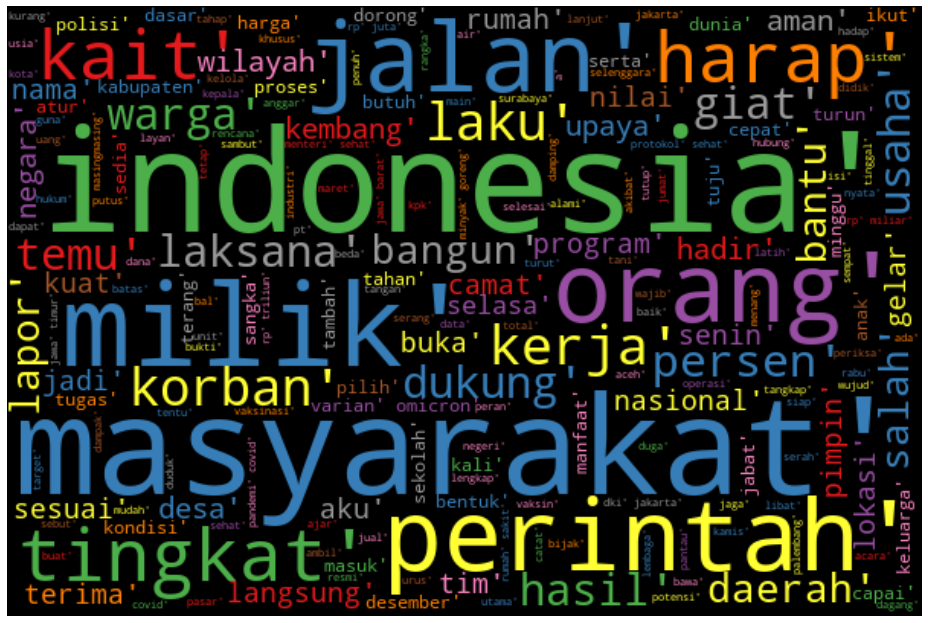

In [56]:
cloud=WordCloud(colormap="Set1",width=600,height=400).generate(str(train_data))
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
freq=pd.Series(" ".join(final_content['content']).split()).value_counts()[:30]
freq.plot(kind="bar", color = "grey")
plt.title("30 kata yang paling banyak muncul",size=20)

In [248]:

class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        #untuk setiap file
        for fname in os.listdir(self.dirname):
            #untuk setiap baris
            for line in open(os.path.join(self.dirname, fname)):
                yield line.split()

In [58]:
def corpus(list):
    s = []
    for x in range(len(list)):
        if not list[x].isdigit():
            if (x != len(list)-1) and (list[x+1].isdigit()):
                for num in range(int(list[x+1])):
                    s.append(list[x])
            else:
                s.append(list[x])
    return ' '.join(s)

In [59]:
from gensim import corpora
# storing the extracted tokens into the dictionary
my_dictionary = corpora.Dictionary(final_content['content2'])
print(my_dictionary)

Dictionary<17270 unique tokens: ['acf', 'advertisement', 'agama', 'ajak', 'ajar']...>


In [60]:
# save your dictionary to disk
my_dictionary.save('my_dictionary.dict')
 
# load back
load_dict = corpora.Dictionary.load('my_dictionary.dict')
                                   
# save your dictionary as text file
from gensim.test.utils import get_tmpfile
tmp_fname = get_tmpfile("dictionary")
my_dictionary.save_as_text(tmp_fname)
 
# load your dictionary text file
load_dict = corpora.Dictionary.load_from_text(tmp_fname)

In [ ]:
# converting to a bag of word corpus
BoW_corpus =[my_dictionary.doc2bow(doc, allow_update = True) for doc in final_content['content2']]
print(BoW_corpus)

In [62]:

from gensim.corpora import MmCorpus
from gensim.test.utils import get_tmpfile
 
output_fname = get_tmpfile("BoW_corpus.mm")
 
# save corpus to disk
MmCorpus.serialize(output_fname, BoW_corpus)
 
# load corpus
load_corpus = MmCorpus(output_fname)

In [ ]:
from gensim import models
import numpy as np
 
# Word weight in Bag of Words corpus
word_weight =[]
for doc in BoW_corpus:
  for id, freq in doc:
    word_weight.append([my_dictionary[id], freq])
print(word_weight)

In [ ]:
# create TF-IDF model
tfIdf = models.TfidfModel(BoW_corpus, smartirs ='ntc')
 
# TF-IDF Word Weight
weight_tfidf =[]
for doc in tfIdf[BoW_corpus]:
  for id, freq in doc:
    weight_tfidf.append([my_dictionary[id], np.around(freq, decimals = 3)])
print(weight_tfidf) 

In [65]:
#final_content['content2'].to_csv('exam.txt', header=True, index=False, sep='\t', mode='a')

In [ ]:
#with open('exam.txt') as f:
#    contents = f.readline()
#    print(contents)

# Replaces escape character with space
#s = contents.replace("\n", " ")

In [67]:
model = gensim.models.Word2Vec(s) 

In [69]:
model = gensim.models.Word2Vec(final_content['content2'], min_count = 1)

In [70]:
list(model.wv.key_to_index)

['indonesia',
 'masyarakat',
 'jakarta',
 'covid',
 'kota',
 'perintah',
 'menteri',
 'orang',
 'jalan',
 'persen',
 'kerja',
 'sehat',
 'laku',
 'tingkat',
 'vaksinasi',
 'milik',
 'rp',
 'hasil',
 'kabupaten',
 'usaha',
 'kait',
 'daerah',
 'negara',
 'rumah',
 'bangun',
 'laksana',
 'korban',
 'desa',
 'anak',
 'harap',
 'capai',
 'kepala',
 'terima',
 'ketua',
 'warga',
 'ekonomi',
 'bantu',
 'program',
 'presiden',
 'dukung',
 'aman',
 'salah',
 'wilayah',
 'giat',
 'vaksin',
 'nasional',
 'harga',
 'jawa',
 'tim',
 'desember',
 'omicron',
 'lapor',
 'dunia',
 'temu',
 'pt',
 'sesuai',
 'kembang',
 'hadir',
 'barat',
 'langsung',
 'camat',
 'provinsi',
 'uang',
 'upaya',
 'hukum',
 'masuk',
 'gelar',
 'juta',
 'tangan',
 'kpk',
 'negeri',
 'terang',
 'gubernur',
 'layan',
 'atur',
 'selasa',
 'bal',
 'dinas',
 'senin',
 'cepat',
 'pilih',
 'informasi',
 'buka',
 'dasar',
 'nomor',
 'aceh',
 'tahan',
 'tugas',
 'duga',
 'tni',
 'wakil',
 'sangka',
 'pimpin',
 'kuat',
 'tinggal',
 '

In [ ]:
# model CBOW mencoba untuk memproyeksikan vektor kata-kata konteks (w_{t-1}, w_{t+1}) untuk memprediksi vektor kata 
# target w_{t}. Sedangkan, model Skip-Gram adalah kebalikannya, yaitu mencoba memprediksi vektor kata-kata yang ada di 
# konteks (w_{t-1}, w_{t+1}) diberikan vektor kata tertentu w_{t}.

# Dari sini, model CBOW cenderung lebih mudah smooth terhadap informasi distribusional karena semua kata-kata konteks 
# langsung diproses menjadi satu vektor sebelum akhirnya digunakan untuk memprediksi vektor kata target. Oleh karena itu, 
# untuk corpus yang lebih kecil ukurannya, model CBOW cenderung lebih baik. Sebaliknya, model Skip-Gram membuat sepasang 
# kata target dan konteks sebagai sebuah instance sehingga Skip-Gram cenderung lebih baik ketika ukuran corpus sangat besar. 

In [71]:
# Print results
print("Cosine similarity between 'indonesia' " +
               "and 'negara' - CBOW : ",
    model.wv.similarity('negara', 'negara'))

print("Cosine similarity between 'negara' " +
                 "and 'truk' - CBOW : ",
      model.wv.similarity('negara', 'truk'))
 
# Create Skip Gram model
model2 = gensim.models.Word2Vec(final_content['content2'], min_count = 1, sg = 1)
 
# Print results
print("Cosine similarity between 'indonesia' " +
          "and 'negara' - Skip Gram : ",
    model2.wv.similarity('indonesia', 'negara'))
     
print("Cosine similarity between 'negara' " +
            "and 'truk' - Skip Gram : ",
      model2.wv.similarity('negara', 'truk'))
     


Cosine similarity between 'indonesia' and 'negara' - CBOW :  1.0
Cosine similarity between 'negara' and 'truk' - CBOW :  0.9879172
Cosine similarity between 'indonesia' and 'negara' - Skip Gram :  0.715538
Cosine similarity between 'negara' and 'truk' - Skip Gram :  0.3561719


In [72]:
# save model
model2.save('./mymodel2')

# load model
#new_model = gensim.models.Word2Vec.load('./mymodel')

In [79]:
model.wv["indonesia"]

array([-6.2764937e-01,  7.8852767e-01,  2.2601865e-01,  3.4501702e-01,
       -1.0201721e-02, -1.5756276e+00,  2.7998003e-01,  1.9090652e+00,
       -8.8414550e-01, -6.0270733e-01, -3.6342508e-01, -1.2221962e+00,
       -5.1315194e-03,  3.8606688e-01,  1.3039373e-01, -7.0302820e-01,
        3.6431706e-01, -9.7434974e-01, -4.9688175e-02, -1.7844975e+00,
        1.0960741e+00,  1.3973980e-01,  2.5787055e-01, -4.7729126e-01,
       -7.1482003e-01, -1.9860178e-01, -9.1386563e-01, -2.7279195e-01,
       -6.0589135e-01, -1.9562939e-01,  8.2731593e-01,  4.8302934e-01,
        5.1822115e-02, -4.9399439e-01, -2.4622010e-01,  1.1150469e+00,
        1.5289624e-01, -9.2951757e-01, -6.7001230e-01, -1.4244339e+00,
        3.4735593e-01, -6.2325329e-01, -2.4417064e-01,  2.3842430e-01,
        5.5226904e-01, -4.1642210e-01, -4.4450533e-01, -1.1596791e-01,
        3.0208790e-01,  7.0920455e-01,  4.8186809e-01, -5.4119688e-01,
       -5.7817775e-01, -2.6265454e-01, -7.3818552e-01,  1.3191941e-03,
      

In [78]:
model2.wv["indonesia"]

array([-0.31219113,  0.09585118,  0.10480866,  0.13848798, -0.44006458,
       -0.31359726,  0.4330083 ,  0.48073894, -0.37260237, -0.26368955,
        0.16539203, -0.28911817,  0.18424135,  0.13889937, -0.11190998,
       -0.23558913,  0.4641389 ,  0.21570578, -0.20634396, -0.55127877,
        0.53472155,  0.3864036 ,  0.02266411, -0.23707104,  0.08279317,
       -0.3836722 , -0.12153356,  0.05697472,  0.01322174, -0.14082727,
        0.38942838,  0.43253937,  0.47042626, -0.263613  , -0.19869488,
        0.6189195 ,  0.03598481, -0.4442025 , -0.27945256, -0.3458037 ,
       -0.07300654,  0.20765671, -0.18318573, -0.14412706,  0.04845706,
        0.38230827,  0.04248752, -0.2205489 , -0.05349318, -0.01768092,
        0.1432447 , -0.19747964, -0.5045863 ,  0.1749444 , -0.06730378,
       -0.156924  ,  0.06463837, -0.13916972, -0.69485515,  0.35159072,
        0.26394856,  0.03198444,  0.02219161,  0.0292783 ,  0.00569819,
        0.07082371, -0.31928375,  0.14016521, -0.50215214,  0.10

In [77]:
model2.wv["masyarakat"]

array([-0.42398295,  0.43803164, -0.02793863,  0.30337846, -0.01420763,
       -0.35806835,  0.34266677,  0.25743   , -0.26268435, -0.3219412 ,
        0.30186388, -0.3439004 ,  0.04794518,  0.02144162, -0.0452927 ,
       -0.10332351,  0.22802764, -0.09364713,  0.10451053, -0.64586085,
        0.20396756,  0.03105963, -0.21955788, -0.18969335, -0.14196786,
       -0.29043382, -0.21990661, -0.09514462, -0.19563417, -0.31979758,
        0.17898592, -0.33751038, -0.15894085, -0.3295911 , -0.21404108,
        0.6479751 ,  0.14247261, -0.1024352 ,  0.10011979, -0.2421385 ,
        0.4351483 , -0.47917187,  0.2678095 ,  0.15837067, -0.01777368,
       -0.29145068,  0.30965555, -0.36889407,  0.35528132,  0.19039534,
        0.41607732, -0.33148545, -0.22926225, -0.234493  ,  0.07959235,
       -0.24858314,  0.7497948 ,  0.24423474, -0.37249345,  0.18659246,
        0.06225315,  0.01813539,  0.15456152, -0.00596794, -0.27721822,
        0.50522774, -0.00331536,  0.24788411, -0.7726217 ,  0.40

In [76]:
model.wv.most_similar("negara")

[('teliti', 0.9977512359619141),
 ('situasi', 0.997644305229187),
 ('lokal', 0.997556746006012),
 ('aktivitas', 0.9975293278694153),
 ('potensi', 0.9974663257598877),
 ('tubuh', 0.9974300861358643),
 ('bersih', 0.9973407983779907),
 ('khawatir', 0.9973047375679016),
 ('kuat', 0.9971373677253723),
 ('pengaruh', 0.9971108436584473)]

In [180]:
model.wv.most_similar("masyarakat")

[('mobilitas', 0.9968394637107849),
 ('laksana', 0.9960833191871643),
 ('cepat', 0.9954056739807129),
 ('imbau', 0.9932044744491577),
 ('tanggulang', 0.9920364618301392),
 ('prokes', 0.9914901852607727),
 ('mendagri', 0.991134762763977),
 ('terap', 0.9906812310218811),
 ('satgas', 0.9900064468383789),
 ('layan', 0.9899773597717285)]

In [181]:
model2.wv.most_similar("masyarakat")

[('ajak', 0.8887930512428284),
 ('edukasi', 0.8805155754089355),
 ('imbau', 0.876891553401947),
 ('mobilitas', 0.8690751194953918),
 ('meta', 0.8682425022125244),
 ('maksimal', 0.8673828840255737),
 ('tnipolri', 0.866654098033905),
 ('pasca', 0.8651540279388428),
 ('perhati', 0.864300012588501),
 ('senantiasa', 0.8630974292755127)]

In [80]:
model.wv.most_similar(positive=["prokes","kemenkes", "satgas"])

[('waspada', 0.9977331757545471),
 ('mobilitas', 0.9976679086685181),
 ('gejala', 0.9971758127212524),
 ('tanggulang', 0.9967615008354187),
 ('siti', 0.9966845512390137),
 ('imbau', 0.9959191679954529),
 ('lonjak', 0.9955623149871826),
 ('isolasi', 0.9954386353492737),
 ('cepat', 0.9947605729103088),
 ('juru', 0.9946731925010681)]

In [81]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [89]:
X = final_content['content2']

In [93]:
# Tokenizing Text -> Repsesenting each word by a number
# Mapping of orginal word to number is preserved in word_index property of tokenizer

#Tokenized applies basic processing like changing it yo lower case, explicitely setting that as False
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

In [94]:
X[0][:10]

[74, 4058, 7, 221, 132, 913, 15, 914, 1215, 6]

In [95]:
#Lets check few word to numerical replesentation
#Mapping is preserved in dictionary -> word_index property of instance
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 10:
        break  

indonesia -> 1
masyarakat -> 2
jakarta -> 3
covid -> 4
kota -> 5
perintah -> 6
menteri -> 7
orang -> 8
jalan -> 9
persen -> 10


In [ ]:
# For determining size of input...

plt.hist([len(x) for x in X], bins=500)
plt.title("Jumlah Kata dari Tiap Berita")
plt.show()


In [98]:
nos = np.array([len(x) for x in X])
len(nos[nos  < 400])
# Out of 1000 news, 961 have less than 400 words

961

In [99]:
#Lets keep all news to 700, add padding to news with less than 700 words and truncating long ones
maxlen = 400 

#Making all news of size maxlen defined above
X = pad_sequences(X, maxlen=maxlen)

In [100]:
len(X[0])

400

In [101]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size inceeases by 1
vocab_size = len(tokenizer.word_index) + 1

In [102]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [ ]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer

#embedding_vectors = get_weight_matrix(model2, word_index)

In [123]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.key_to_index:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=2000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15, 13)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [528]:
#tsne_plot(model)

In [105]:
# Mengetahui urutan atau ranking berdasarkan frekuensinya untuk suatu kata
msy = model.wv.key_to_index["masyarakat"]

# Menghitung frekuensi untuk suatu kata 
msy_cnt = model.wv.get_vecattr("masyarakat", "count")

# Panjang atau banyak kata unik keseluruhan
vocab_len = len(model.wv)

In [ ]:
# word vector for the word "indonesia"
print(model.wv['indonesia'])

In [467]:
# menghitung similarity vektor antara dua kata
print (model.wv.similarity('indonesia', 'negeri'))

0.9898163


In [ ]:
# mencari top-N similar words
print (model.wv.similar_by_word('kita', topn=10, restrict_vocab=None))

In [ ]:
# kata-kata yang ingin kita plot vektornya
word_list = ['kita', 'dia', 'Anda', 'operasi', 'katarak']

# daftar vektor dari kata-kata tersebut
word_vectors = np.array([model.wv[w] for w in word_list])

In [ ]:
# reduksi dimensi vektor ke 2D agar bisa di-plot pada bidang 2D
dimred = PCA(n_components=2, copy=False, whiten=True)
red_word_vectors = dimred.fit_transform(word_vectors)

In [ ]:
def plot(datas, labels, fc='yellow'):
    # plot the dots
    plt.subplots_adjust(bottom = 0.1)
    plt.scatter(datas[:, 0], datas[:, 1], marker='o')

    # annotate labels
    for label, x, y in zip(labels, datas[:, 0], datas[:, 1]):
        plt.annotate( \
            label, \
            xy=(x, y), xytext=(-15, 15), \
            textcoords='offset points', ha='right', va='bottom', \
            bbox=dict(boxstyle='round,pad=0.3', fc=fc, alpha=0.5), \
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

    plt.show()

# kita plot !
plot(word_vectors, word_list)

In [ ]:
# Uji Kebaikan Model (model dan model2)
# One way to test your embedding is see how often your model agrees with the common consensus of how other embeddings complete word analogies. ??
# Cari tahu lagi!

In [120]:
# TES MODEL 2
# 1. kata "presiden" harus memiliki probability yang tinggi (> 0.5) dengan kata "ketua"
print ("Probabilitas kesamaan antara kata 'presiden' dan 'ketua' adalah ", (model2.wv.similarity('presiden', 'ketua')))

# 2. kata "rumah" harus memiliki probability yang rendah (< 0.5) dengan kata "acara"
print ("Probabilitas kesamaan antara kata 'rumah' dan 'acara' adalah ", (model2.wv.similarity('rumah', 'acara')))

Probabilitas kesamaan antara kata 'presiden' dan 'ketua' adalah  0.5523085
Probabilitas kesamaan antara kata 'rumah' dan 'acara' adalah  0.3203359


In [134]:
# 3. jika "presiden" untuk "indonesia", maka "ketua" untuk?
# Menguji kecocokkan untuk kata "presiden"
sims_pres = model2.wv.most_similar('presiden', topn=10)
sims_pres

[('joko', 0.9472217559814453),
 ('widodo', 0.945141077041626),
 ('jokowi', 0.9251741170883179),
 ('vladimir', 0.8382390737533569),
 ('maruf', 0.8264856338500977),
 ('putin', 0.8231221437454224),
 ('istana', 0.8220306038856506),
 ('tunda', 0.8183681964874268),
 ('kabinet', 0.8162950873374939),
 ('amin', 0.8160783648490906)]

In [135]:
print ("Probabilitas keberkaitan antara kata 'presiden' dan 'indonesia' adalah ", (model2.wv.similarity('presiden', 'indonesia')))

Probabilitas keberkaitan antara kata 'presiden' dan 'indonesia' adalah  0.5339079


In [131]:
sims_ket = model2.wv.most_similar('ketua', topn=10)
sims_ket

[('dpc', 0.9015701413154602),
 ('dewan', 0.8931748270988464),
 ('fraksi', 0.8924372792243958),
 ('dpd', 0.8815169334411621),
 ('puan', 0.8777361512184143),
 ('maharani', 0.8727549910545349),
 ('gerindra', 0.87032151222229),
 ('dpp', 0.8653402924537659),
 ('dpr', 0.8634111285209656),
 ('demokrat', 0.8572423458099365)]

In [140]:
print ("Probabilitas keberkaitan antara kata 'ketua' dan 'organisasi' adalah ", (model2.wv.similarity('ketua', 'organisasi')))
print ("Probabilitas keberkaitan antara kata 'ketua' dan 'rt' adalah ", (model2.wv.similarity('ketua', 'rt')))

Probabilitas keberkaitan antara kata 'ketua' dan 'organisasi' adalah  0.6353551
Probabilitas keberkaitan antara kata 'ketua' dan 'rt' adalah  0.56665313


In [141]:
# Print results
print("Cosine similarity between 'presiden' " +
               "and 'ketua' - CBOW : ",
    model.wv.similarity('presiden', 'ketua'))

print("Cosine similarity between 'rumah' " +
                 "and 'acara' - CBOW : ",
      model.wv.similarity('rumah', 'acara'))

 
# Print results
print("Cosine similarity between 'presiden' " +
          "and 'ketua' - Skip Gram : ",
    model2.wv.similarity('presiden', 'ketua'))
     
print("Cosine similarity between 'rumah' " +
            "and 'acara - Skip Gram : ",
      model2.wv.similarity('rumah', 'acara'))
     


Cosine similarity between 'presiden' and 'ketua' - CBOW :  0.98297936
Cosine similarity between 'rumah' and 'acara' - CBOW :  0.98855597
Cosine similarity between 'presiden' and 'ketua' - Skip Gram :  0.5523085
Cosine similarity between 'rumah' and 'acara - Skip Gram :  0.3203359


In [184]:
# kata-kata yang ingin kita plot vektornya
word_list = list(model2.wv.key_to_index)
word_list2 = ['indonesia', 'presiden', 'dewan', 'ketua', 'rumah', 'acara', 'masyarakat', 'prokes']

# daftar vektor dari kata-kata tersebut
word_vectors = np.array([model2.wv[w] for w in word_list])

In [166]:
# reduksi dimensi vektor ke 2D agar bisa di-plot pada bidang 2D
dimred = PCA(n_components=2, copy=False, whiten=True)
red_word_vectors = dimred.fit_transform(word_vectors)

In [163]:
def plot(datas, labels, fc='yellow'):
    # plot the dots
    plt.subplots_adjust(bottom = 0.1)
    plt.scatter(datas[:, 0], datas[:, 1], marker='o')

    # annotate labels
    for label, x, y in zip(labels, datas[:, 0], datas[:, 1]):
        plt.annotate( \
            label, \
            xy=(x, y), xytext=(-15, 15), \
            textcoords='offset points', ha='right', va='bottom', \
            bbox=dict(boxstyle='round,pad=0.3', fc=fc, alpha=0.5), \
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

    plt.show()

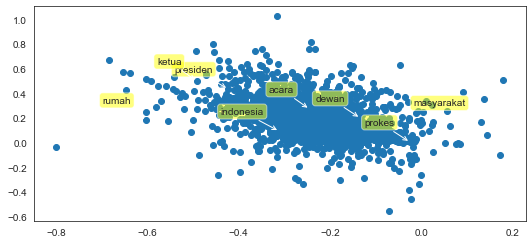

In [185]:
plot(word_vectors, word_list2)